<a href="https://colab.research.google.com/github/duongnhathuy/A_I/blob/main/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10, directory='/content/drive/MyDrive/Food/',
shuffle=True, target_size=(150, 150), subset="training", class_mode='categorical')
validation_dataset = image_generator.flow_from_directory(batch_size=10, directory='/content/drive/MyDrive/Food/',
shuffle=True, target_size=(150, 150), subset="validation", class_mode='categorical')

Found 1989 images belonging to 10 classes.
Found 492 images belonging to 10 classes.


In [ ]:
# X_train.shape, y_train.shape,X_test.shape,y_test.shape
train_dataset.classes
train_dataset.class_indices

{'Banh chung': 0,
 'Banh mi': 1,
 'Bun dau mam tom': 2,
 'Bun thit nuong': 3,
 'Ca kho to': 4,
 'Canh chua': 5,
 'Chao long': 6,
 'Com tam': 7,
 'Goi cuon': 8,
 'Pho': 9}

In [ ]:
import numpy as np  
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM 
from keras.models import Sequential 
from tensorflow.keras.utils import to_categorical
from keras import callbacks 
from sklearn .metrics import  precision_score,recall_score, confusion_matrix, classification_report, accuracy_score,f1_score 

In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten

model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(150,150,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_dataset,batch_size=32,epochs=100,verbose=1,validation_data=validation_dataset)

Epoch 98/100
199/199 [==============================] - 50s 249ms/step - loss: 0.4372 - accuracy: 0.6576 - val_loss: 4.9671 - val_accuracy: 0.2337
Epoch 99/100
199/199 [==============================] - 51s 258ms/step - loss: 0.4375 - accuracy: 0.6647 - val_loss: 5.2228 - val_accuracy: 0.2175
Epoch 100/100
199/199 [==============================] - 50s 250ms/step - loss: 0.4422 - accuracy: 0.6576 - val_loss: 5.1128 - val_accuracy: 0.2134


In [ ]:
model.save('Food.h5')

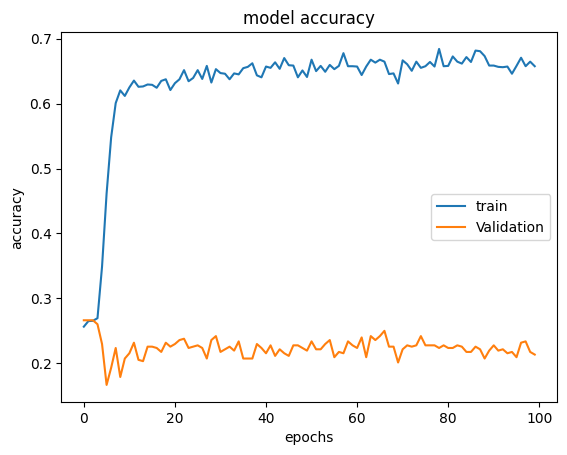

In [ ]:
# vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
#in sai so va do chinh xac
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  5.112760543823242
Độ chính xác  0.21341463923454285


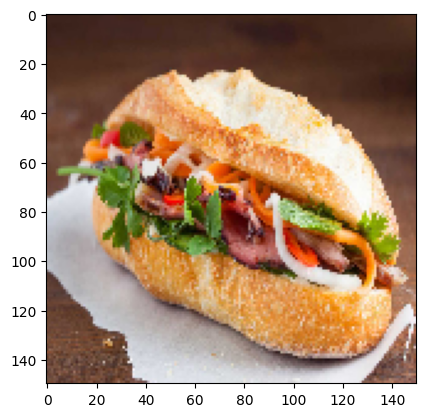

1/1 [==============================] - 0s 24ms/step
Bánh mỳ


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = '/content/drive/MyDrive/Food/banhmi-test.jpg'

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Bánh chưng")
if(kq==1):
    print("Bánh mỳ")
if(kq==2):
    print("Bún đậu mắm tôm")
if(kq==3):
    print("Bún thịt nướng")
if(kq==4):
    print("Cá kho tộ")
if(kq==5):
    print("Canh chua")
if(kq==6):
    print("Cháo lòng")
if(kq==7):
    print("Cơm tấm")
if(kq==8):
    print("Gỏi cuốn")
if(kq==9):
    print("Phở")